In [10]:
import pandas as pd
import pickle

In [11]:
pkls_active_torchvision = !ls ./experiments/active_torchvision/*/*.pkl
pkls_projections = !ls ./experiments/projections/*/*.pkl
pkls = pkls_active_torchvision + pkls_projections
pkls

['./experiments/active_torchvision/cifar10/acq_bald_cs_argmax_batch_1000_labeled_1000_budget_16000_seed_1231212.pkl',
 './experiments/active_torchvision/cifar10/acq_bald_cs_argmax_batch_1000_labeled_1000_budget_16000_seed_2139843534.pkl',
 './experiments/active_torchvision/cifar10/acq_bald_cs_argmax_batch_1000_labeled_1000_budget_16000_seed_9438745.pkl',
 './experiments/active_torchvision/cifar10/acq_bald_cs_argmax_batch_1000_labeled_5000_budget_12000_seed_1231212.pkl',
 './experiments/active_torchvision/cifar10/acq_bald_cs_argmax_batch_1000_labeled_5000_budget_12000_seed_2139843534.pkl',
 './experiments/active_torchvision/cifar10/acq_bald_cs_argmax_batch_1000_labeled_5000_budget_12000_seed_9438745.pkl',
 './experiments/active_torchvision/cifar10/acq_bald_cs_argmax_batch_2000_labeled_1000_budget_16000_seed_1231212.pkl',
 './experiments/active_torchvision/cifar10/acq_bald_cs_argmax_batch_2000_labeled_1000_budget_16000_seed_2139843534.pkl',
 './experiments/active_torchvision/cifar10/acq_

In [66]:
loaded_pkls = []
for pkl in pkls:
    # A file path looks like ./experiments/active_torchvision/svhn/acq_softrankbald_cs_stochastic_batch_500_labeled_3000_budget_4000_seed_9438745.pkl
    # Extract the dataset from pkl (svhn)
    dataset = pkl.split("/")[-2]
    # Split off the file name
    filename = pkl.split("/")[-1]
    if "gamma" in filename:
        # filename is ./experiments/projections/cifar10/acq_proj_cs_fw_batch_4000_gamma_07_budget_12000_seed_1231212.pkl
        # the pattern is acq_{acq_function}_cs_{selection_method}_batch_{batch_size}_gamma_{gamma}_budget_{active_budget}_seed_{seed}.pkl
        _, acq_function, _, selection_method, _, batch_size, _, gamma, _, active_budget, _, seed = filename.split('.')[0].split('_')
    else:
        # filename is acq_softrankbald_cs_stochastic_batch_500_labeled_3000_budget_4000_seed_9438745.pkl
        # the pattern is acq_{acq_function}_cs_{selection_method}_batch_{batch_size}_labeled_{initial_size}_budget_{active_budget}_seed_{seed}.pkl
        _, acq_function, _, selection_method, _, batch_size, _, initial_size, _, active_budget, _, seed = filename.split('.')[0].split('_')

    with open(pkl, "br") as file:
        key = dict(
            dataset=dataset,
            acq_function=acq_function,
            selection_method=selection_method,
            batch_size=batch_size,
            active_budget=active_budget,
            seed=seed
        )
        loaded_pkls.append((key, pickle.load(file)))

In [67]:
[(key, label, value['Acc'][-1]) for key, result in loaded_pkls for label, value in result.items()]

[({'dataset': 'cifar10',
   'acq_function': 'bald',
   'selection_method': 'argmax',
   'batch_size': '1000',
   'active_budget': '16000',
   'seed': '1231212'},
  'BALD Argmax (M=1000)',
  0.7872178819444444),
 ({'dataset': 'cifar10',
   'acq_function': 'bald',
   'selection_method': 'argmax',
   'batch_size': '1000',
   'active_budget': '16000',
   'seed': '2139843534'},
  'BALD Argmax (M=1000)',
  0.8060980902777778),
 ({'dataset': 'cifar10',
   'acq_function': 'bald',
   'selection_method': 'argmax',
   'batch_size': '1000',
   'active_budget': '16000',
   'seed': '9438745'},
  'BALD Argmax (M=1000)',
  0.8001302083333334),
 ({'dataset': 'cifar10',
   'acq_function': 'bald',
   'selection_method': 'argmax',
   'batch_size': '1000',
   'active_budget': '12000',
   'seed': '1231212'},
  'BALD Argmax (M=1000)',
  0.8306206597222222),
 ({'dataset': 'cifar10',
   'acq_function': 'bald',
   'selection_method': 'argmax',
   'batch_size': '1000',
   'active_budget': '12000',
   'seed': '21

In [68]:
loaded_pkls[0]

({'dataset': 'cifar10',
  'acq_function': 'bald',
  'selection_method': 'argmax',
  'batch_size': '1000',
  'active_budget': '16000',
  'seed': '1231212'},
 {'BALD Argmax (M=1000)': {'LL': [3.820821656121148,
    3.188099834654066,
    2.7056925296783447,
    2.355988714430067,
    2.1975766817728677,
    2.0813390811284385,
    2.0442890988455877,
    1.9534320169024997,
    1.8405303292804294,
    1.763101061185201,
    1.757780498928494,
    1.7124470074971516,
    1.6440761221779718,
    1.5978346003426447,
    1.544978380203247,
    1.5062420500649347,
    1.4807084136539035],
   'Acc': [0.4776475694444444,
    0.5482855902777778,
    0.5891927083333334,
    0.6287977430555556,
    0.65234375,
    0.6723090277777778,
    0.6907552083333334,
    0.701171875,
    0.7253689236111112,
    0.7388237847222222,
    0.7454427083333334,
    0.7494574652777778,
    0.7611762152777778,
    0.7702907986111112,
    0.7791883680555556,
    0.7850477430555556,
    0.7872178819444444],
   'ppos':

In [69]:
import pandas as pd

In [70]:
# Convert loaded_pkls to a dataframe
df = pd.DataFrame(
    [
        {
            **key,
            "label": label,
            **value
        }
        for key, result in loaded_pkls for label, value in result.items()
    ]
)

In [71]:
df.columns

Index(['dataset', 'acq_function', 'selection_method', 'batch_size',
       'active_budget', 'seed', 'label', 'LL', 'Acc', 'ppos', 'wt',
       'num_samples', 'num_evals', 'init_num_labeled', 'train_idx'],
      dtype='object')

In [72]:
# drop train_idx column
df = df.drop(columns=['train_idx', 'ppos', 'num_evals'])

In [73]:
df

,dataset,acq_function,selection_method,batch_size,active_budget,seed,label,LL,Acc,wt,num_samples,init_num_labeled
0,cifar10,bald,argmax,1000,16000,1231212,BALD Argmax (M=1000),"[3.820821656121148, 3.188099834654066, 2.70569...","[0.4776475694444444, 0.5482855902777778, 0.589...","[0.0, 131.57209873199463, 199.84890222549438, ...","[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, ...",1000
1,cifar10,bald,argmax,1000,16000,2139843534,BALD Argmax (M=1000),"[3.94671720928616, 3.123489591810438, 2.661789...","[0.4714626736111111, 0.5512152777777778, 0.592...","[0.0, 129.80736255645752, 197.74175572395325, ...","[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, ...",1000
2,cifar10,bald,argmax,1000,16000,9438745,BALD Argmax (M=1000),"[3.8612310886383057, 3.037504540549384, 2.6145...","[0.4676649305555556, 0.5572916666666666, 0.606...","[0.0, 130.79844999313354, 199.1720781326294, 2...","[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, ...",1000
3,cifar10,bald,argmax,1000,12000,1231212,BALD Argmax (M=1000),"[1.6140085326300726, 1.6962994734446208, 1.615...","[0.6606987847222222, 0.7105034722222222, 0.730...","[0.0, 155.95782136917114, 249.76084733009338, ...","[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, ...",5000
4,cifar10,bald,argmax,1000,12000,2139843534,BALD Argmax (M=1000),"[1.6671055290434096, 1.7000315056906805, 1.548...","[0.6694878472222222, 0.7116970486111112, 0.742...","[0.0, 241.30448818206787, 379.3563697338104, 5...","[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, ...",5000
...,...,...,...,...,...,...,...,...,...,...,...,...
516,svhn,proj,fw,500,4000,2139843534,"Proj FW (M=500, J=10, g=0.7)","[0.7874252486228943, 0.7249420785903931, 0.679...","[0.83796875, 0.865078125, 0.87671875, 0.891171...","[0.0, 210.51018023490906, 318.43755054473877, ...","[0, 426, 884, 1316, 1740, 2183, 2575, 2965, 33...",3000
517,svhn,proj,fw,500,4000,9438745,"Proj FW (M=500, J=10, g=0.7)","[0.8301822233200074, 0.7778336930274964, 0.708...","[0.8318359375, 0.8605078125, 0.8747265625, 0.8...","[0.0, 202.17853808403015, 305.4707467556, 412....","[0, 469, 937, 1386, 1801, 2236, 2676, 3080, 34...",3000
518,svhn,proj,fw,500,6000,1231212,"Proj FW (M=500, J=10, g=0.7)","[1.5455835056304932, 1.2694607019424438, 1.039...","[0.7383203125, 0.7948828125, 0.827265625, 0.85...","[0.0, 128.31147956848145, 194.61397671699524, ...","[0, 454, 912, 1368, 1770, 2208, 2654, 3090, 35...",1000
519,svhn,proj,fw,500,6000,2139843534,"Proj FW (M=500, J=10, g=0.7)","[1.448173861503601, 1.1164796352386475, 0.9109...","[0.75640625, 0.8162109375, 0.8460546875, 0.865...","[0.0, 131.39100122451782, 199.8971667289734, 2...","[0, 462, 921, 1381, 1811, 2260, 2706, 3144, 35...",1000


In [74]:
exploded_df = df.explode(['LL', 'Acc', 'wt', 'num_samples'], ignore_index=True)

In [75]:
exploded_df

,dataset,acq_function,selection_method,batch_size,active_budget,seed,label,LL,Acc,wt,num_samples,init_num_labeled
0,cifar10,bald,argmax,1000,16000,1231212,BALD Argmax (M=1000),3.820822,0.477648,0.0,0,1000
1,cifar10,bald,argmax,1000,16000,1231212,BALD Argmax (M=1000),3.1881,0.548286,131.572099,1000,1000
2,cifar10,bald,argmax,1000,16000,1231212,BALD Argmax (M=1000),2.705693,0.589193,199.848902,2000,1000
3,cifar10,bald,argmax,1000,16000,1231212,BALD Argmax (M=1000),2.355989,0.628798,268.252648,3000,1000
4,cifar10,bald,argmax,1000,16000,1231212,BALD Argmax (M=1000),2.197577,0.652344,343.329,4000,1000
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,svhn,proj,fw,500,6000,9438745,"Proj FW (M=500, J=10, g=0.7)",0.549226,0.911133,942.981196,5207,1000
7039,svhn,proj,fw,500,6000,9438745,"Proj FW (M=500, J=10, g=0.7)",0.532121,0.915664,1031.183324,5617,1000
7040,svhn,proj,fw,500,6000,9438745,"Proj FW (M=500, J=10, g=0.7)",0.540328,0.917148,1123.971101,5934,1000
7041,svhn,proj,fw,500,6000,9438745,"Proj FW (M=500, J=10, g=0.7)",0.539625,0.915781,1217.014721,5999,1000


In [77]:
# Create a new label based on the acq_function and selection_method
exploded_df['new_label'] = exploded_df['acq_function'] + '_' + exploded_df['selection_method']

In [64]:
import seaborn as sns

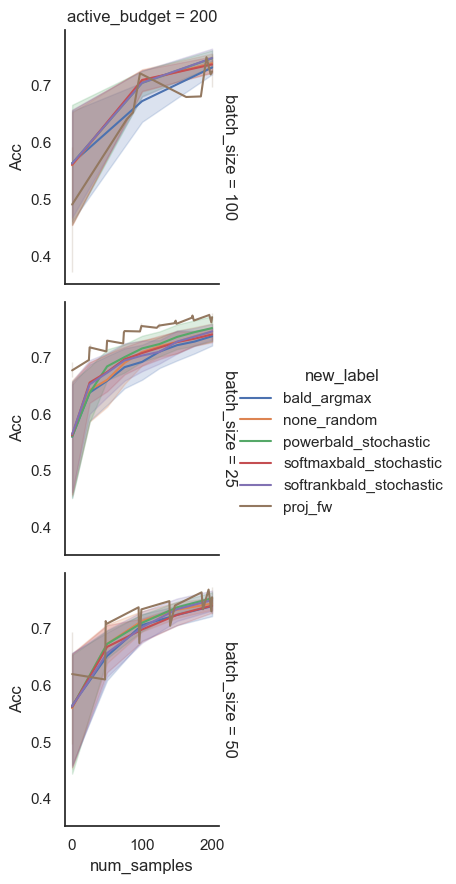

In [85]:
# Plot cifar10 acc in a grid of plots by initial size and batch size
sns.set_theme(style="white")
g = sns.FacetGrid(exploded_df[exploded_df['dataset'] == 'cifar'], col="active_budget", row="batch_size", hue="new_label", margin_titles=True)
g.map(sns.lineplot, "num_samples", "Acc")
g.add_legend()
# make the background white opaque instead of transparent
g.fig.patch.set_facecolor('white')
g.fig.patch.set_alpha(1)
